# Data Processing renewables ninja

In [54]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

## France Wind (hourly data, 1980-2019)

In [24]:
# Open file
with open('ninja_wind_country_FR_current-merra-2_corrected.csv', 'r') as file:
    lines = file.readlines()
    skip_rows = 0
    for line in lines:
        if "time" in line:
            break
        skip_rows += 1

# Lecture du fichier avec les lignes d'en-tête ignorées
data = pd.read_csv('ninja_wind_country_FR_current-merra-2_corrected.csv', skiprows=skip_rows)

# Suppression des colonnes non nommées (NaN)
data = data.dropna(axis=1, how='all')

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_12348\2462820471.py:11: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ninja_wind_country_FR_current-merra-2_corrected.csv', skiprows=skip_rows)


In [25]:
data.head()

,# Units: time in UTC,other columns are capacity factors [0-1]. Simulation represents 10,837 MW of capacity,of which 10
0,time,national,offshore,onshore
1,1980-01-01 00:00:00,0.1017,0.0588,0.1017
2,1980-01-01 01:00:00,0.0853,0.0571,0.0854
3,1980-01-01 02:00:00,0.0733,0.1107,0.0733
4,1980-01-01 03:00:00,0.0639,0.1801,0.0638


### Data pre-processing

In [26]:

# Correction des en-têtes de colonne
# Les en-têtes actuels sont répartis sur deux lignes, nous devons les combiner correctement

# On suppose que la première ligne après les lignes d'en-tête contient les bons noms de colonne
column_headers = data.iloc[0]
data = data[1:]  # Suppression de la ligne contenant les noms de colonne actuels

# Renommage des colonnes
data.columns = column_headers

# Conversion de la colonne 'time' en type datetime pour faciliter les analyses ultérieures
data['time'] = pd.to_datetime(data['time'])

# Réinitialisation de l'index du dataframe
data.reset_index(drop=True, inplace=True)

# Vérification du format final du dataframe
data.head()

,time,national,offshore,onshore
0,1980-01-01 00:00:00,0.1017,0.0588,0.1017
1,1980-01-01 01:00:00,0.0853,0.0571,0.0854
2,1980-01-01 02:00:00,0.0733,0.1107,0.0733
3,1980-01-01 03:00:00,0.0639,0.1801,0.0638
4,1980-01-01 04:00:00,0.0575,0.2087,0.0574


### Graphic visualization

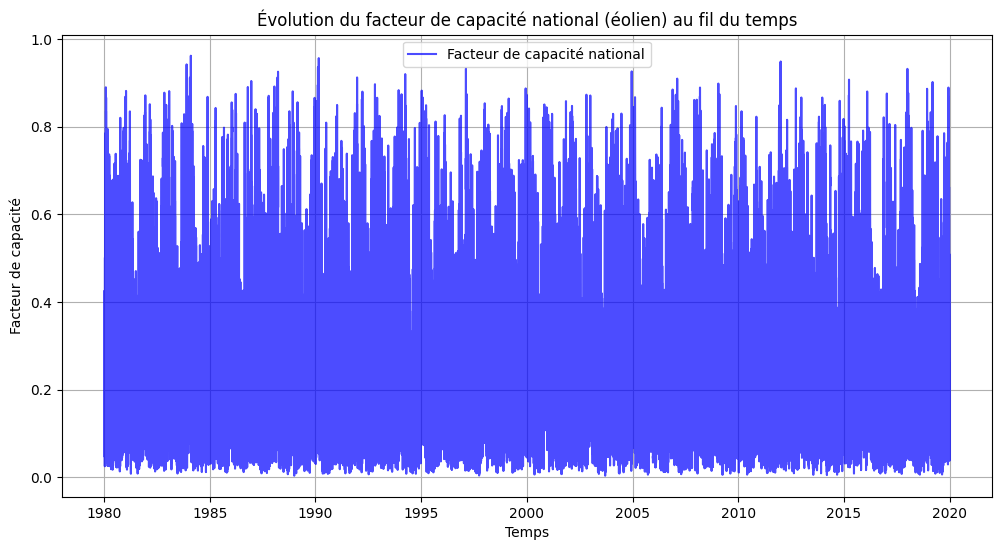

In [29]:
# Conversion des colonnes en valeurs numériques pour le tracé
data['national'] = pd.to_numeric(data['national'], errors='coerce')
data['offshore'] = pd.to_numeric(data['offshore'], errors='coerce')
data['onshore'] = pd.to_numeric(data['onshore'], errors='coerce')

# Création du graphique de série temporelle pour la capacité nationale
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['national'], label='Facteur de capacité national', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité national (éolien) au fil du temps')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()


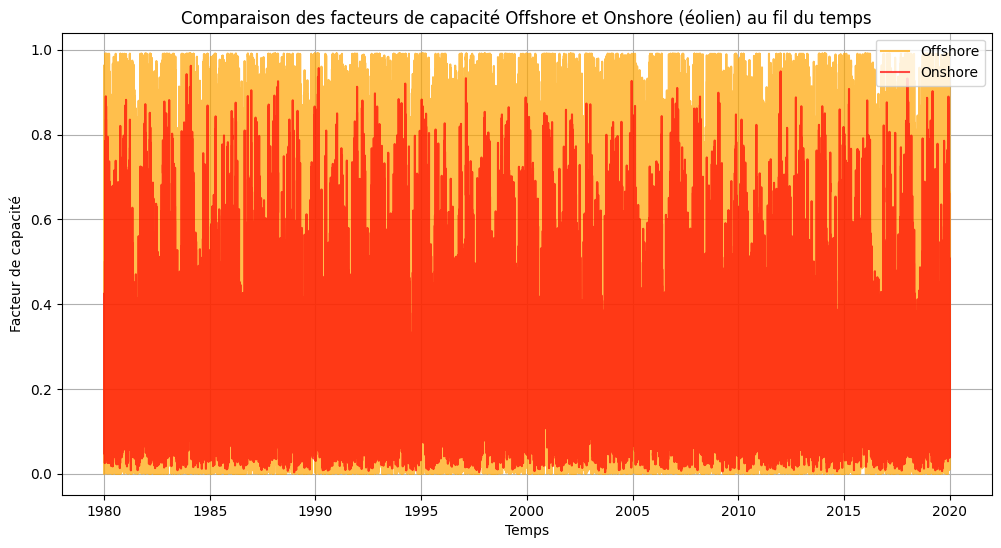

In [31]:
# Création du graphique comparatif pour les capacités offshore et onshore
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['offshore'], label='Offshore', color='orange', alpha=0.7)
plt.plot(data['time'], data['onshore'], label='Onshore', color='red', alpha=0.7)
plt.title('Comparaison des facteurs de capacité Offshore et Onshore (éolien) au fil du temps')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()


## France PV (hourly data, 1980-2019)

In [37]:
# Open file
with open('ninja_pv_country_FR_merra-2_corrected.csv', 'r') as file:
    lines = file.readlines()
    skip_rows = 0
    for line in lines:
        if "time" in line:
            break
        skip_rows += 1

# Lecture du fichier avec les lignes d'en-tête ignorées
data_pv = pd.read_csv('ninja_pv_country_FR_merra-2_corrected.csv', skiprows=skip_rows)

# Suppression des colonnes non nommées (NaN)
data_pv = data_pv.dropna(axis=1, how='all')

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_12348\1438687410.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_pv = pd.read_csv('ninja_pv_country_FR_merra-2_corrected.csv', skiprows=skip_rows)


In [38]:
data_pv.head()

,"# Units: time in UTC, other columns are capacity factors [0-1]. Bias corrected using national generation data.",Unnamed: 1
0,time,national
1,1980-01-01 00:00:00,0
2,1980-01-01 01:00:00,0
3,1980-01-01 02:00:00,0
4,1980-01-01 03:00:00,0


### Data pre-processing

In [49]:
# Détecter automatiquement le nombre de lignes à sauter en cherchant où les données commencent réellement
skip_rows = 0
with open('ninja_pv_country_FR_merra-2_nuts-2_corrected.csv', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if "time" in line:  # Supposons que les données commencent avec une colonne 'time'
            break
        skip_rows += 1

# Lecture du fichier avec les lignes d'en-tête ignorées
pv_data = pd.read_csv('ninja_pv_country_FR_merra-2_nuts-2_corrected.csv', skiprows=skip_rows)

# Suppression des colonnes non nommées (NaN)
pv_data = pv_data.dropna(axis=1, how='all')

# Affichage des premières lignes après nettoyage
pv_data.head()

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_12348\208680237.py:11: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  pv_data = pd.read_csv('ninja_pv_country_FR_merra-2_nuts-2_corrected.csv', skiprows=skip_rows)


,"# Units: time in UTC, other columns are capacity factors [0-1]. Bias corrected using national generation data.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,time,FR10,FR21,FR22,FR23,FR24,FR25,FR26,FR30,FR41,...,FR52,FR53,FR61,FR62,FR63,FR71,FR72,FR81,FR82,FR83
1,1980-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1980-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1980-01-01 02:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1980-01-01 03:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Correction des en-têtes de colonne en utilisant la première ligne de données
pv_column_headers = pv_data.iloc[0]
pv_data = pv_data[1:]  # Suppression de la première ligne qui contient les noms de colonne actuels
pv_data.columns = pv_column_headers  # Application des noms de colonne corrects

# Conversion de la colonne 'time' en type datetime
pv_data['time'] = pd.to_datetime(pv_data['time'])

# Conversion des valeurs des facteurs de capacité en valeurs numériques
for col in pv_data.columns[1:]:  # Exclure la colonne 'time' de la conversion
    pv_data[col] = pd.to_numeric(pv_data[col], errors='coerce')

# Réinitialisation de l'index du dataframe
pv_data.reset_index(drop=True, inplace=True)

# Vérification du format final du dataframe
pv_data.head()

,time,FR10,FR21,FR22,FR23,FR24,FR25,FR26,FR30,FR41,...,FR52,FR53,FR61,FR62,FR63,FR71,FR72,FR81,FR82,FR83
0,1980-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1980-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1980-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1980-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1980-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Extraction des noms des régions à partir des en-têtes des colonnes, en excluant la colonne 'time'
region_names = pv_data.columns[1:-1]  # Exclure 'time' et 'national_mean'
region_names.tolist()

['FR10',
 'FR21',
 'FR22',
 'FR23',
 'FR24',
 'FR25',
 'FR26',
 'FR30',
 'FR41',
 'FR42',
 'FR43',
 'FR51',
 'FR52',
 'FR53',
 'FR61',
 'FR62',
 'FR63',
 'FR71',
 'FR72',
 'FR81',
 'FR82',
 'FR83']

### Graphic visualization

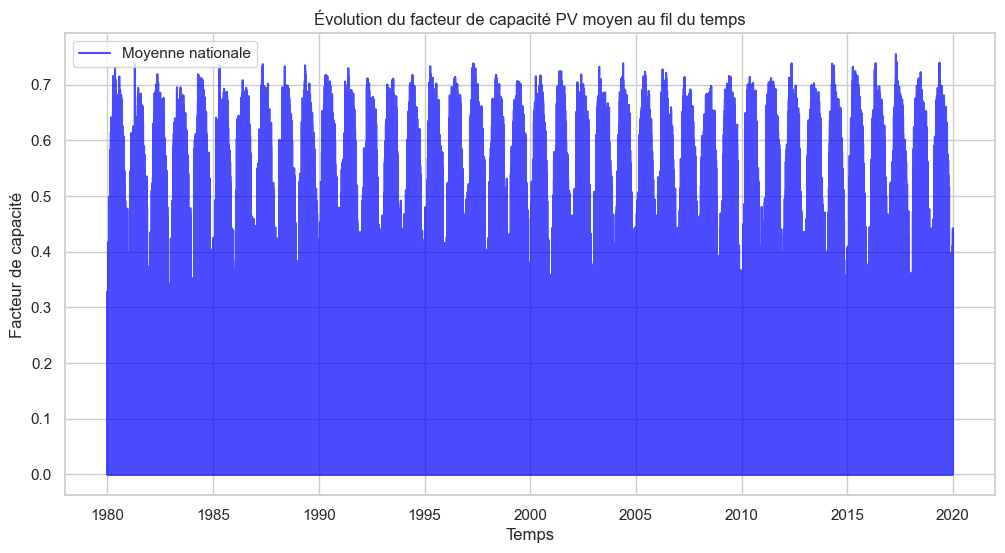

In [60]:
# Configuration des graphiques
sns.set(style="whitegrid")

# Préparation des données pour la moyenne nationale
pv_data['national_mean'] = pv_data.iloc[:, 1:].mean(axis=1)

# 1. Série temporelle des facteurs de capacité PV pour la moyenne nationale
plt.figure(figsize=(12, 6))
plt.plot(pv_data['time'], pv_data['national_mean'], label='Moyenne nationale', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité PV moyen au fil du temps')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.show()

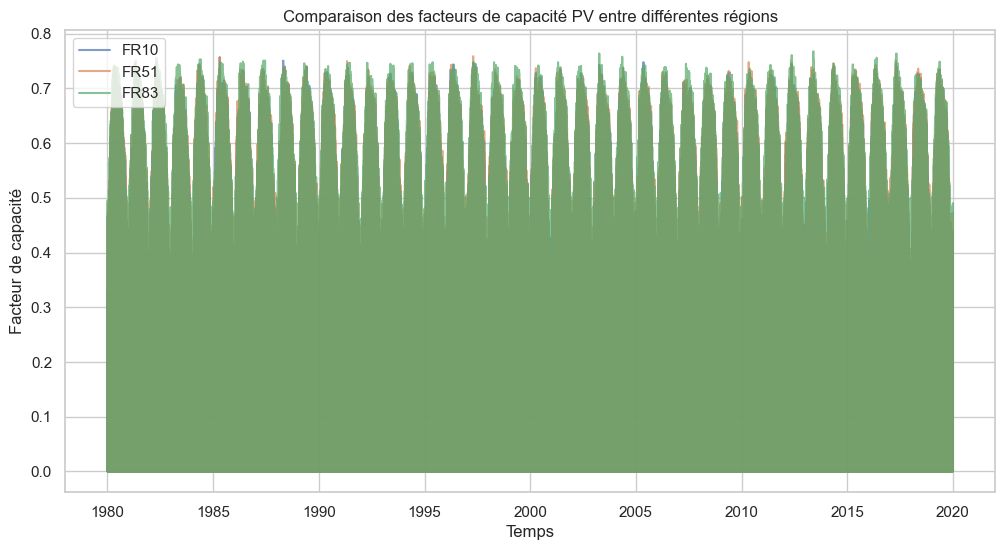

In [65]:
# 2. Comparaison des régions - Prenons quelques régions pour l'exemple
regions_to_compare = ['FR10', 'FR51', 'FR83']
plt.figure(figsize=(12, 6))
for region in regions_to_compare:
    plt.plot(pv_data['time'], pv_data[region], label=region, alpha=0.7)
plt.title('Comparaison des facteurs de capacité PV entre différentes régions')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.show()

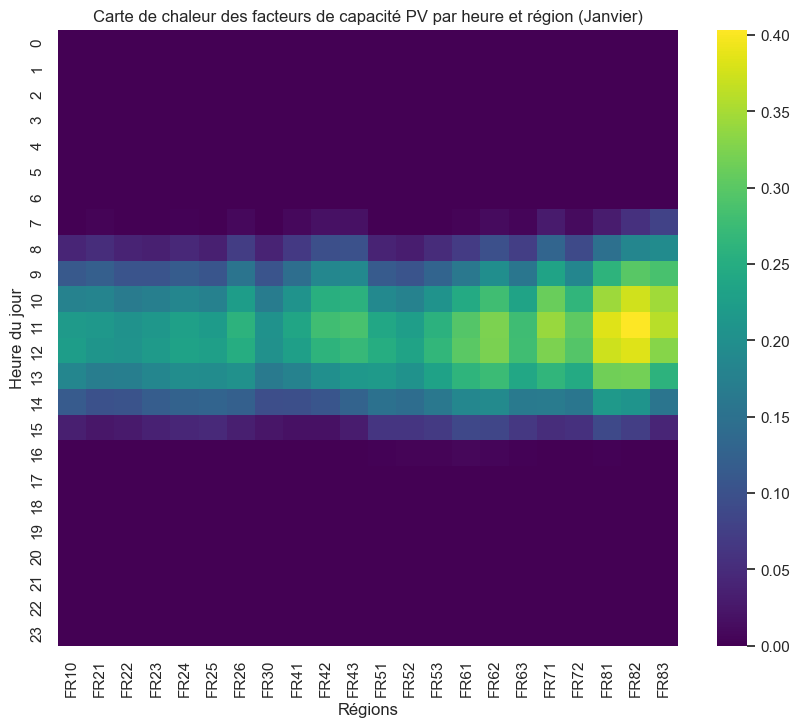

In [62]:
# 3. Heatmap pour les facteurs de capacité PV
# Pour des raisons de performance, prenons un sous-ensemble de données (par exemple, un mois)
pv_data_subset = pv_data[pv_data['time'].dt.month == 1]  # Janvier
pv_data_subset_hours = pv_data_subset.set_index(pv_data_subset['time'].dt.hour)
pv_data_heatmap = pv_data_subset_hours.groupby(pv_data_subset_hours.index).mean()
plt.figure(figsize=(10, 8))
sns.heatmap(pv_data_heatmap.iloc[:, 1:-1], cmap="viridis")
plt.title('Carte de chaleur des facteurs de capacité PV par heure et région (Janvier)')
plt.xlabel('Régions')
plt.ylabel('Heure du jour')
plt.show()

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_12348\3128327368.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pv_data[region], hist=False, kde=True,
c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_12348\3128327368.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

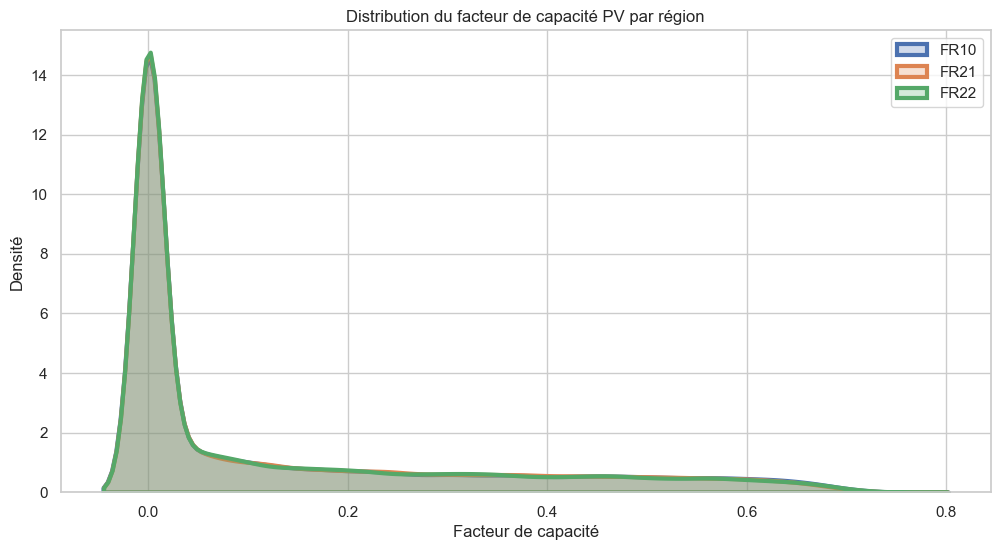

In [63]:
# 4. Distribution du facteur de capacité - Prenons quelques régions pour l'exemple
plt.figure(figsize=(12, 6))
for region in regions_to_compare:
    sns.distplot(pv_data[region], hist=False, kde=True, 
                 kde_kws={'shade': True, 'linewidth': 3}, 
                 label=region)
plt.title('Distribution du facteur de capacité PV par région')
plt.xlabel('Facteur de capacité')
plt.ylabel('Densité')
plt.legend()
plt.show()

## France Weather (hourly data, 1980-2019)

In [66]:
weather_file_path = 'ninja_weather_country_FR_merra-2_land_area_weighted.csv'

# Essayons d'abord de lire le fichier pour voir si nous pouvons le charger sans erreurs
try:
    # Lecture des premières lignes pour inspection
    weather_data = pd.read_csv(weather_file_path, nrows=5)
    weather_successful_read = True
    weather_preview = weather_data
except Exception as e:
    weather_successful_read = False
    weather_preview = str(e)

weather_successful_read, weather_preview

(True,
   # Renewables.ninja Weather (hourly data, 1980-2019) - France - ninja_weather_country_FR_merra-2_land_area_weighted.csv - Version: 1.3 - License: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy - Reference: https://renewables.ninja and https://doi.org/10.1175/JCLI-D-16-0758.1  \
 0  # Units: time in UTC, other columns are averag...                                                                                                                                                                                                                                                                      
 1                                               time                                                                                                                                                                                                                                                                      
 2                                1980-01-01 

### Data pre-processing

In [68]:
# Nettoyage des données

# Les noms de colonnes corrects sont dans la deuxième ligne (index 1) du fichier CSV
weather_column_headers = weather_data.iloc[1]
weather_data = weather_data[2:]  # On supprime les deux premières lignes qui ne sont pas des données
weather_data.columns = weather_column_headers  # On applique les noms de colonnes corrects

# On convertit la colonne 'time' en type datetime
weather_data['time'] = pd.to_datetime(weather_data['time'])

# On convertit les autres colonnes en valeurs numériques
numeric_columns = weather_data.columns[1:]  # On exclut la colonne 'time' de la conversion
for col in numeric_columns:
    weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')

# On réinitialise l'index du dataframe après le nettoyage
weather_data.reset_index(drop=True, inplace=True)

# Vérification du format final du dataframe
weather_data.head()

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_12348\4184339943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['time'] = pd.to_datetime(weather_data['time'])
C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_12348\4184339943.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')


1,time,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
0,1980-01-01 00:00:00,0.1961,-0.723,0,0,0.0253,7.5439,0.9449,1.2379
1,1980-01-01 01:00:00,0.2908,-0.676,0,0,0.0492,7.5837,0.9552,1.2378
2,1980-01-01 02:00:00,0.3664,-0.585,0,0,0.0734,7.6469,0.9463,1.2375


### Data visualization

In [78]:
print(daily_temp_mean.head())
daily_temp_mean = weather_data.groupby(weather_data['time'].dt.date)['temperature'].mean()

print(daily_temp_mean.isna().sum())


time
1980-01-01   -0.661333
Name: temperature, dtype: float64
0


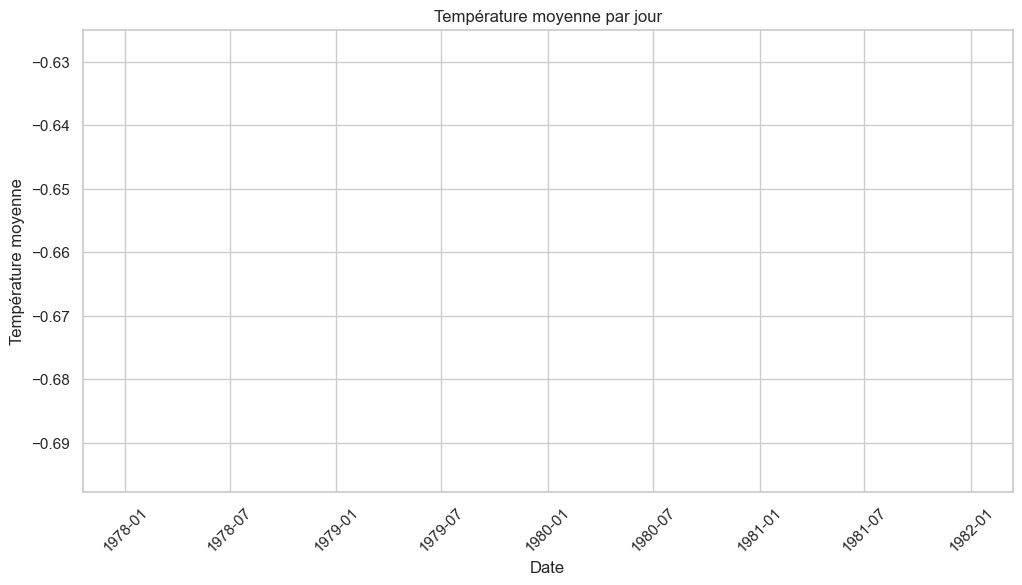

In [69]:
# Graphique de série temporelle pour la température moyenne par jour 

# Calcul de la température moyenne par jour
daily_temp_mean = weather_data.groupby(weather_data['time'].dt.date)['temperature'].mean()

# Tracé du graphique de série temporelle
plt.figure(figsize=(12, 6))
plt.plot(daily_temp_mean.index, daily_temp_mean.values)
plt.title('Température moyenne par jour')
plt.xlabel('Date')
plt.ylabel('Température moyenne')
plt.xticks(rotation=45)
plt.show()

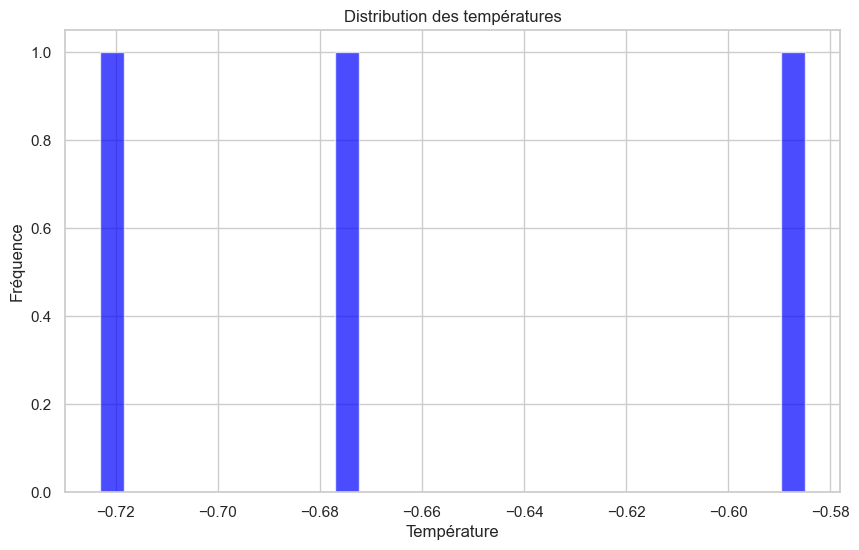

In [70]:
# Histogramme pour la distribution de la température
plt.figure(figsize=(10, 6))
plt.hist(weather_data['temperature'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution des températures')
plt.xlabel('Température')
plt.ylabel('Fréquence')
plt.show()

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_12348\1119479479.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data['temperature'], shade=True, color='blue')


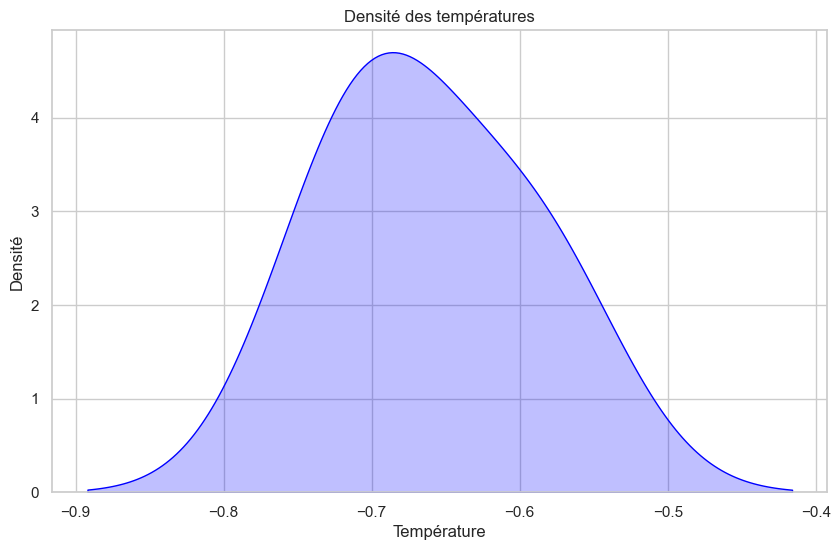

In [71]:
# Graphique pour les densités de température
plt.figure(figsize=(10, 6))
sns.kdeplot(weather_data['temperature'], shade=True, color='blue')
plt.title('Densité des températures')
plt.xlabel('Température')
plt.ylabel('Densité')
plt.show()

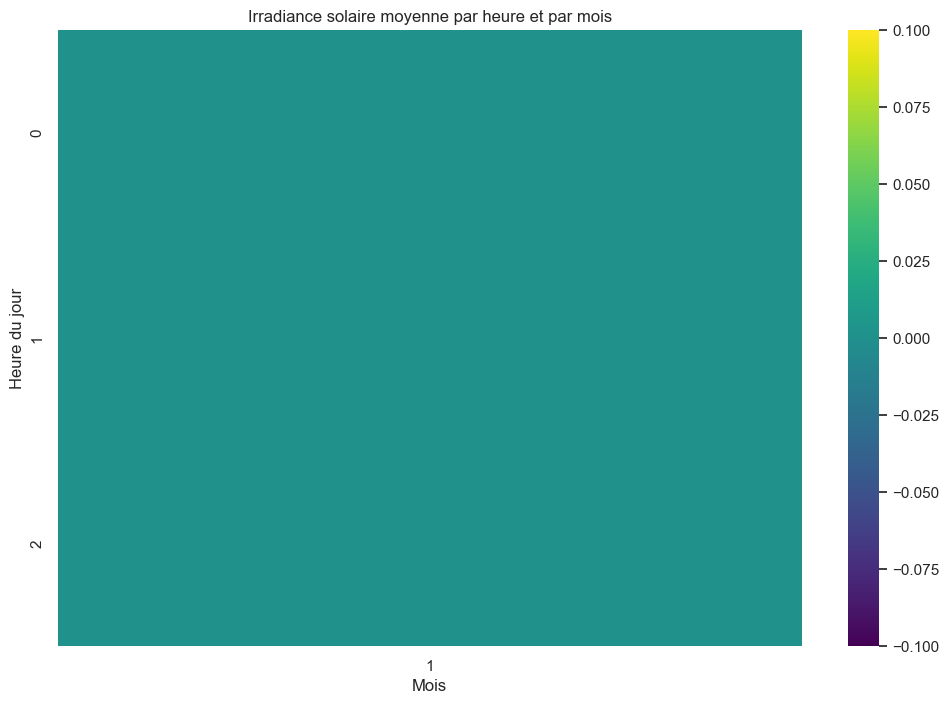

In [72]:
# Heatmap pour l'irradiance solaire moyenne par heure et par mois :
# Préparation des données pour la heatmap
irradiance_hour_month = weather_data.pivot_table(index=weather_data['time'].dt.hour, 
                                                 columns=weather_data['time'].dt.month, 
                                                 values='irradiance_surface', 
                                                 aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(irradiance_hour_month, cmap='viridis')
plt.title('Irradiance solaire moyenne par heure et par mois')
plt.xlabel('Mois')
plt.ylabel('Heure du jour')
plt.show()

c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


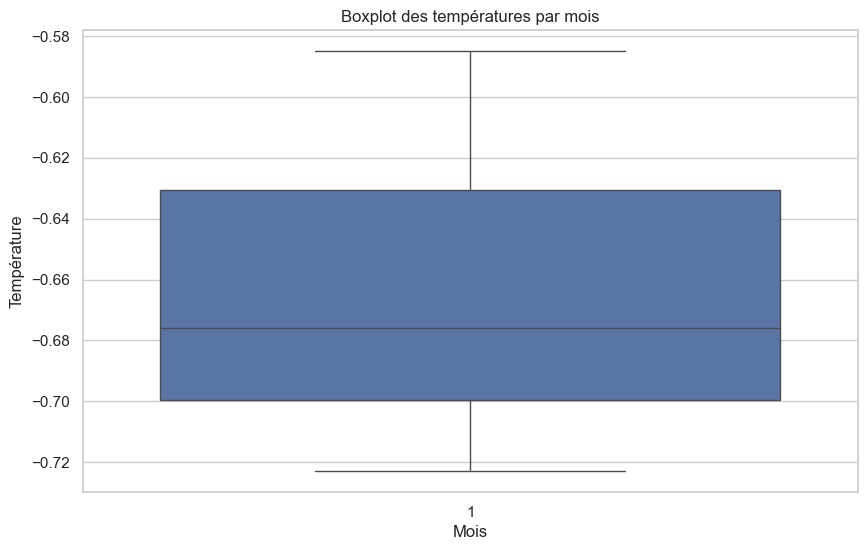

In [73]:
# Boxplot pour la température
plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_data, x=weather_data['time'].dt.month, y='temperature')
plt.title('Boxplot des températures par mois')
plt.xlabel('Mois')
plt.ylabel('Température')
plt.show()


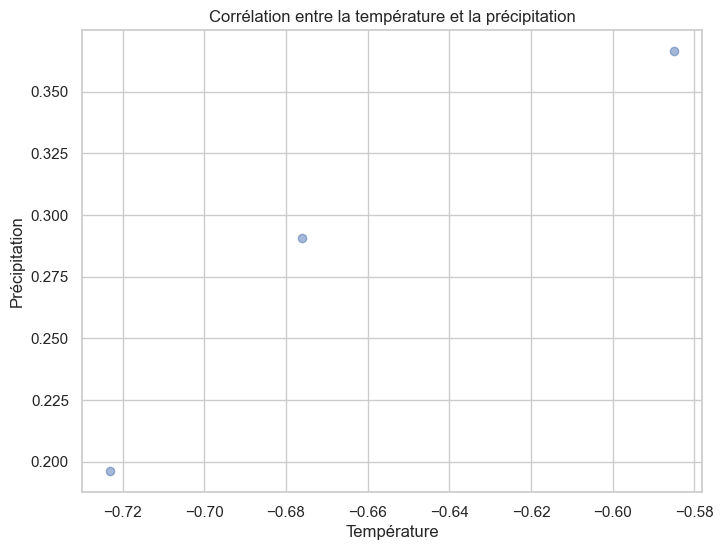

In [74]:
# Graphique de corrélation entre la température et la précipitation :

plt.figure(figsize=(8, 6))
plt.scatter(weather_data['temperature'], weather_data['precipitation'], alpha=0.5)
plt.title('Corrélation entre la température et la précipitation')
plt.xlabel('Température')
plt.ylabel('Précipitation')
plt.show()


## Geneva wind

In [88]:
# Définissons le chemin du nouveau fichier CSV pour le traitement
wind_geneva_file_path = 'ninja_wind_geneva.csv'

# Essayons d'abord de lire le fichier pour voir si nous pouvons le charger sans erreurs
try:
    wind_geneva_data = pd.read_csv(wind_geneva_file_path, nrows=5, sep=',', skiprows=3)
    wind_geneva_successful_read = True
    wind_geneva_preview = wind_geneva_data
except Exception as e:
    wind_geneva_successful_read = False
    wind_geneva_preview = str(e)

wind_geneva_successful_read, wind_geneva_preview

(True,
                time        local_time  electricity
 0  2019-01-01 00:00  2019-01-01 01:00        0.085
 1  2019-01-01 01:00  2019-01-01 02:00        0.084
 2  2019-01-01 02:00  2019-01-01 03:00        0.073
 3  2019-01-01 03:00  2019-01-01 04:00        0.059
 4  2019-01-01 04:00  2019-01-01 05:00        0.044)

In [91]:
wind_geneva_data = pd.read_csv(wind_geneva_file_path, nrows=5, sep=',', skiprows=3)
wind_geneva_data.head()

,time,local_time,electricity
0,2019-01-01 00:00,2019-01-01 01:00,0.085
1,2019-01-01 01:00,2019-01-01 02:00,0.084
2,2019-01-01 02:00,2019-01-01 03:00,0.073
3,2019-01-01 03:00,2019-01-01 04:00,0.059
4,2019-01-01 04:00,2019-01-01 05:00,0.044


### Graphic visualization

In [93]:
wind_geneva_data['time'] = pd.to_datetime(wind_geneva_data['time'])
wind_geneva_data['local_time'] = pd.to_datetime(wind_geneva_data['local_time'])

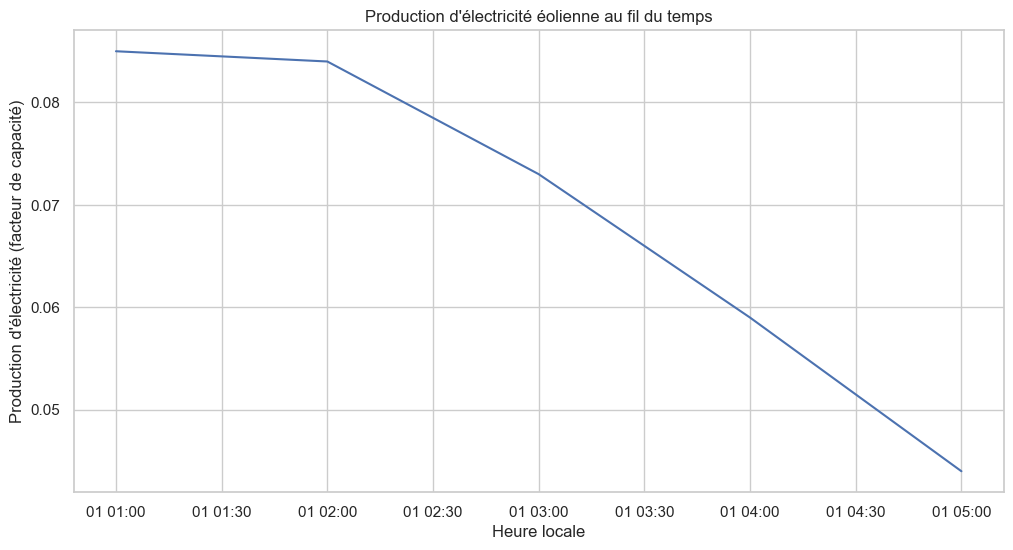

In [94]:
# 1. Graphique de série temporelle
plt.figure(figsize=(12, 6))
plt.plot(wind_geneva_data['local_time'], wind_geneva_data['electricity'])
plt.title('Production d\'électricité éolienne au fil du temps')
plt.xlabel('Heure locale')
plt.ylabel('Production d\'électricité (facteur de capacité)')
plt.show()


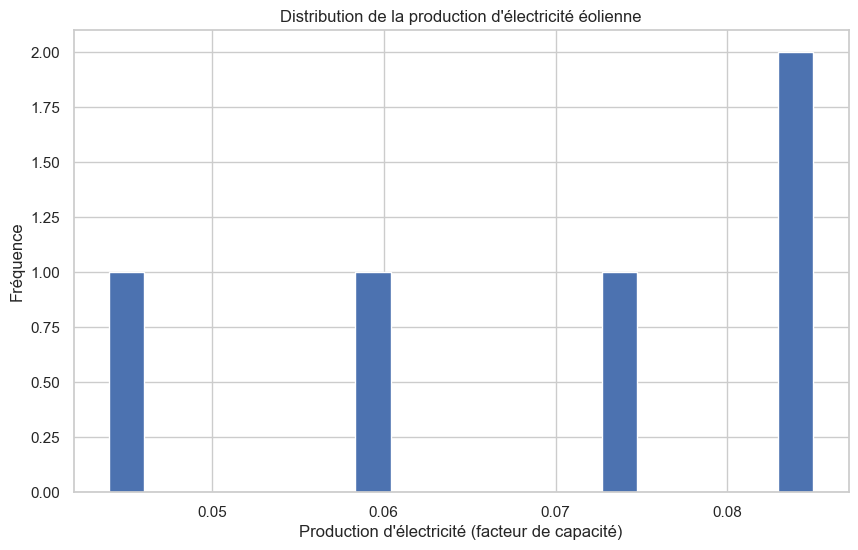

In [95]:
# 2. Histogramme
plt.figure(figsize=(10, 6))
plt.hist(wind_geneva_data['electricity'], bins=20)
plt.title('Distribution de la production d\'électricité éolienne')
plt.xlabel('Production d\'électricité (facteur de capacité)')
plt.ylabel('Fréquence')
plt.show()

c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 0, 'Heure de la journée')

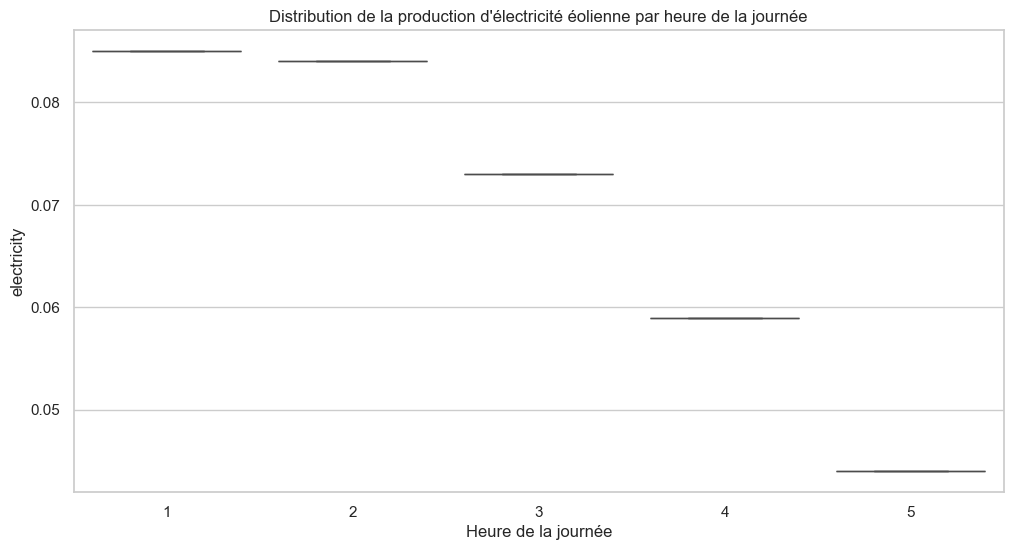

In [97]:
# 3. Boxplot par heure
plt.figure(figsize=(12, 6))
sns.boxplot(x=wind_geneva_data['local_time'].dt.hour, y='electricity', data=wind_geneva_data)
plt.title('Distribution de la production d\'électricité éolienne par heure de la journée')
plt.xlabel('Heure de la journée')